This is implementation of the GAN paper (https://arxiv.org/abs/1406.2661) (Generative model) wit PyTorch


Referred/Inspiration:
- https://www.digitalocean.com/community/tutorials/implementing-gans-in-tensorflow#generative-adversarial-networks
- https://towardsdatascience.com/implementing-deep-convolutional-gan-f76e9b9af270/

Forma

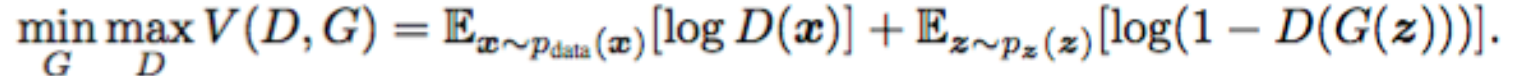

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
from torch.utils.data import DataLoader

In [2]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, 784), nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [3]:
# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512), nn.LeakyReLU(0.2),
            nn.Linear(512, 1), nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(-1, 784))


In [4]:
# Training Parameters
latent_dim, epochs, batch_size, lr = 100, 30, 128, 0.0002

In [5]:
# Data Preparation
dataloader = DataLoader(datasets.MNIST("./data", train=True, transform=transforms.ToTensor(), download=True), batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen, disc = Generator(latent_dim).to(device), Discriminator().to(device)
criterion = nn.BCELoss()
opt_G, opt_D = optim.Adam(gen.parameters(), lr, betas=(0.5, 0.999)), optim.Adam(disc.parameters(), lr, betas=(0.5, 0.999))


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 123MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 40.0MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found




100%|██████████| 1.65M/1.65M [00:00<00:00, 61.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.53MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Training Loop
for epoch in range(epochs):
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = gen(z)

        # Train Discriminator
        opt_D.zero_grad()
        d_loss = criterion(disc(real_imgs), torch.ones(batch_size, 1, device=device)) + criterion(disc(fake_imgs.detach()), torch.zeros(batch_size, 1, device=device))
        d_loss.backward()
        opt_D.step()

        # Train Generator
        opt_G.zero_grad()
        g_loss = criterion(disc(fake_imgs), torch.ones(batch_size, 1, device=device))
        g_loss.backward()
        opt_G.step()

    print(f"Epoch {epoch+1}/{epochs} Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")
    vutils.save_image(fake_imgs, f"generated_{epoch}.png", normalize=True)

print("Training Complete!")


Epoch 1/30 Loss D: 0.7749, Loss G: 1.5355
Epoch 2/30 Loss D: 0.7281, Loss G: 1.8129
Epoch 3/30 Loss D: 0.6720, Loss G: 1.7527
Epoch 4/30 Loss D: 1.0352, Loss G: 1.6810
Epoch 5/30 Loss D: 0.8989, Loss G: 1.5321
Epoch 6/30 Loss D: 0.8417, Loss G: 1.7007
Epoch 7/30 Loss D: 0.7826, Loss G: 1.8543
Epoch 8/30 Loss D: 0.9606, Loss G: 1.5893
